# Predicting High Quality White Wine

We want to use measurabily features of wine to predict if if will be considered high quality or not. We have data about 4,898 white wines and how those measure in a number of features. We have a target variable for wether or not the wine is considered high quality which is a binary transformaiotn of the columne "quality". If the quality is greater than 7 then the wine is considered high quality. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/winequality-white.csv")

In [3]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

df["High Quality"] = [1 if i > 7 else 0 for i in df["quality"]]

LR: 0.963 (0.007)
DT: 0.963 (0.006)
RF: 0.964 (0.007)
Ada: 0.961 (0.007)
NB: 0.926 (0.015)
KMeans: 0.964 (0.006)
LDA: 0.963 (0.006)
MLP: 0.963 (0.007)


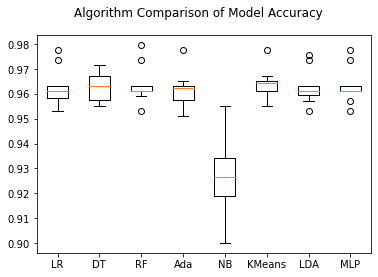

In [5]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef


df=df.dropna()
X = df[features]  
Y = df['High Quality'] 
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []

models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=10000)))
models.append(('DT', DecisionTreeClassifier(max_depth=6)))
models.append(('RF', RandomForestClassifier(max_depth=6)))
models.append(('Ada', AdaBoostClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KMeans', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=5000)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})"
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison of Model Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()